# Homework 1: Social Network Analysis

In [1]:
# To delete
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy.sparse as ssp
from graphLib import Graph
from itertools import combinations
import matplotlib.pyplot as plt

## Example

In [3]:
#--- read the graph file and construct a graph
graph = Graph(ssp.load_npz('../data/example_graph.npz'))

In [4]:
# number of nodes in graph:
n = graph.n
print(n)

10


In [5]:
# get the adjacency matrix of graph

A = graph.get_adj_matrix()
print(A)

[[0 0 0 0 1 0 1 1 0 0]
 [0 0 1 0 0 0 0 0 1 0]
 [0 1 0 0 0 1 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [1 0 0 1 0 1 1 0 0 1]
 [0 0 1 0 1 0 0 0 0 0]
 [1 0 1 0 1 0 0 1 0 1]
 [1 0 0 0 0 0 1 0 0 1]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 1 0 0]]


In [6]:
# get adjacency list

adj_list = graph.get_adj_list()
for i in range(n):
	print(i, adj_list[i])

0 [4, 6, 7]
1 [2, 8]
2 [1, 5, 6]
3 [4]
4 [0, 3, 5, 6, 9]
5 [2, 4]
6 [0, 2, 4, 7, 9]
7 [0, 6, 9]
8 [1]
9 [4, 6, 7]


In [7]:
# get degree sequence

deg_seq = graph.get_deg_seq()
print(deg_seq)

[3 2 3 1 5 2 5 3 1 3]


## Task 1: Compute Graph Properties [45 points]

In [25]:
from task_1 import compute_deg_distr, get_cc_local, get_cc_global, get_diameter

### Task 1.1: Degree Distribution

In [26]:
#--- read the graph file and construct a graph
graph_ER = Graph(ssp.load_npz('../data/graph_ER.npz'))
graph_BA = Graph(ssp.load_npz('../data/graph_BA.npz'))

In [27]:
#--- obtain degree sequence and associated counts
degs_ER,counts_ER = compute_deg_distr(graph_ER)
degs_BA,counts_BA = compute_deg_distr(graph_BA)

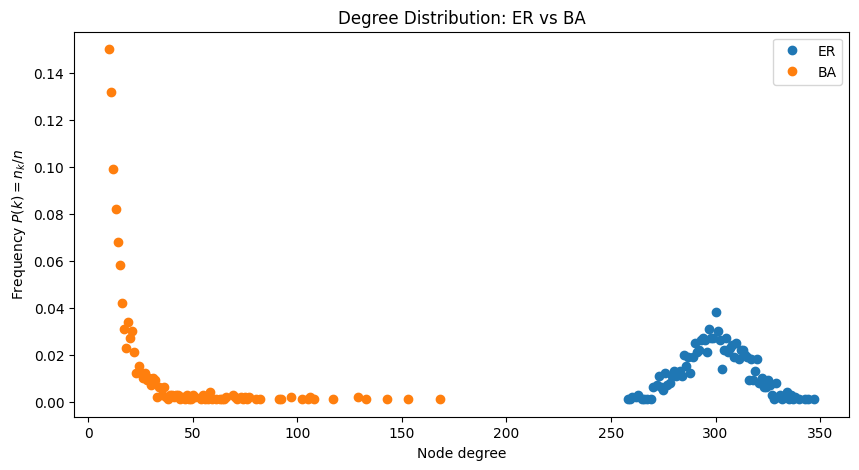

In [11]:
#--- plot the degree distribution

fig, axs = plt.subplots(1,1, figsize=(10,5))

x = degs_ER
y = counts_ER/graph_ER.n
axs.plot(x,y,'o')
axs.set_xlabel('Node degree')
axs.set_ylabel('Frequency $P(k) = n_k/n$')

x = degs_BA
y = counts_BA/graph_BA.n
axs.plot(x,y,'o')
axs.set_title("Degree Distribution: ER vs BA")
axs.set_xlabel('Node degree')
axs.set_ylabel('Frequency $P(k) = n_k/n$')
axs.legend(['ER', 'BA'])

fig.savefig('../result/task1.1.png')

### Task 1.2: Clustering Coefficients

In [12]:
for i in [0,5]:
    print(get_cc_local(graph,i))

0.6666666666666666
0.0


In [13]:
cc_global = get_cc_global(graph)
print(cc_global)

### Task 1.3: Graph Diameter

In [15]:
diameter = get_diameter(graph)
print(diameter)

## Task 2: Compute Node Centralities [35 points]

In [10]:
from task_2 import get_eigen_centrality, build_matrix, get_btw_c

### Task 2.1: Eigenvector Centrality

In [11]:
# TODO: find the top-10 nodes and their eigenvector centralities
eign_centralities = get_eigen_centrality(graph_BA)
top_10_nodes = eign_centralities.argsort()[-10:][::-1]
top_10_eigen_centrality = eign_centralities[top_10_nodes]

top_10_nodes, top_10_eigen_centrality

(array([11, 10, 14, 13, 12, 17, 15, 21, 18,  4]),
 array([0.22220326, 0.1885474 , 0.17257038, 0.16716856, 0.16432737,
        0.1532532 , 0.13829445, 0.1344587 , 0.13182516, 0.12867559]))

### Task 2.2: Betweenness Centrality

In [13]:
# build 2 global matrices: a distance matrix, and a matrix storing the number of shortest pathes
n = graph_BA.n
distance_mat = np.zeros((n,n), dtype = int)
num_shortest_path_mat = np.zeros((n,n), dtype = int)

In [14]:
# construct the two matrices - it is recommended you save the two matrices into files since they 
# take a lot of time to compute 
build_matrix(graph_BA,distance_mat,num_shortest_path_mat)

100%|██████████| 1000/1000 [00:15<00:00, 64.93it/s]


In [15]:
# TODO: compute the betweenness centrality for each node

# compute centrality for node 0 (this is just an example)
centralities = [
    get_btw_c(graph_BA, i, distance_mat,num_shortest_path_mat)
    for i in range(n)
]

# find the top-10 nodes and their betweenness centralities
top_10_nodes = np.argsort(centralities)[-10:][::-1]
top_10_betweenness = np.array(centralities)[top_10_nodes]

top_10_nodes, top_10_betweenness

(array([11, 10, 14, 17, 13, 12, 21, 23,  7, 15]),
 array([0.05096738, 0.04652255, 0.04310593, 0.03669016, 0.03472014,
        0.03324388, 0.02845195, 0.02464716, 0.02406178, 0.02377615]))

## Task 3: Link Prediction [20 points]

In [66]:
from task_3 import gen_net_obs, compute_Jaccard, compute_Katz, link_pred

graph = Graph(ssp.load_npz('../data/ws_graph.npz'))

# load the test edges and non_edges
test_edges = np.loadtxt('../data/target.edges',dtype = int)
test_non_edges = np.loadtxt('../data/target.nonedges', dtype = int)
pos_num = len(test_edges)
neg_num = len(test_non_edges)

# 1 denotes an edge; 0 denotes a non-edge
ground_truth = np.concatenate((np.ones(pos_num,dtype = int),np.zeros(neg_num,dtype = int)), axis = 0)

In [63]:
# TODO: generate observed network

In [64]:
adj_obs, test_set = gen_net_obs(graph, test_edges,test_non_edges)

In [65]:
# TODO: Get similarity based on metric (Katz or Jaccard)

In [ ]:
jaccardsim = compute_Jaccard(adj_obs,test_set)
np.savetxt('../result/Jac_sim.txt', jaccardsim, fmt = '%f')

In [ ]:
katzsim = compute_Katz(adj_obs,test_set)
np.savetxt('../result/Katz_sim.txt', katzsim, fmt = '%f')

In [ ]:
# TODO: make prediction

In [ ]:
pred_jac=link_pred(adj_obs, test_set, 'Jaccard',0.1)
pred_katz=link_pred(adj_obs, test_set, 'Katz',0.02)

In [ ]:
# TODO: compute accuracy based on pred and groundtruth
# accuracy  =  correctly predicted node pairs/total number of pairs
acc_jac = 0

In [ ]:
acc_katz = 0

## Task 4: Generate Random Graphs [20 points]

### Task 4.1: Erdos-Renyi Graph [10 points]

In [67]:
from task_4 import gen_ER, gen_BA

In [69]:
# parameters - DO NOT CHANGE the seed
seed = 14
n = 200
p = 0.2
m = 5

# TODO: get the adj matrix A for erdos-renyi graphs
A_ER = gen_ER(n,p,seed)

# save the matrix A into file
ssp.save_npz('../result/task_4_graph_ER.npz', ssp.csr_matrix(A))

In [78]:
degs_sorted

array([ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       14, 14, 14, 15, 15, 15, 16, 16, 17, 17, 17, 17, 17, 19, 20, 22, 22,
       23, 26, 26, 27, 27, 30, 31, 33, 35, 37, 38, 45, 59])

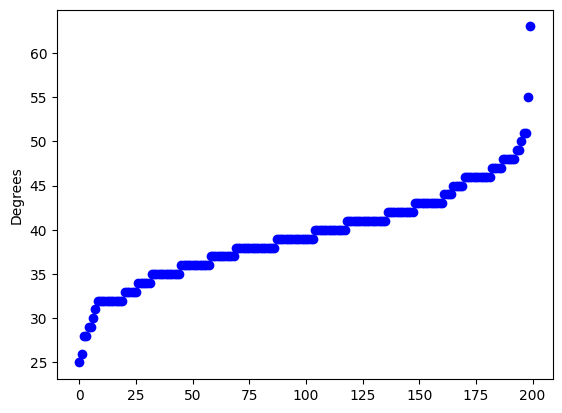

In [70]:
degs_sorted = np.sort(sum(A_ER))

plt.plot(range(len(degs_sorted)),degs_sorted,'bo')
plt.ylabel('Degrees')
plt.show()

### Task 4.1: Erdos-Renyi Graph [10 points]

In [71]:
# TODO: get the adj matrix A for BA graphs
A_BA = gen_BA(n,m,seed)

# save the matrix A into file
ssp.save_npz('../result/task_4_graph_BA.npz', ssp.csr_matrix(A))

### Task 4.2: Erdos-Renyi Graph [10 points]

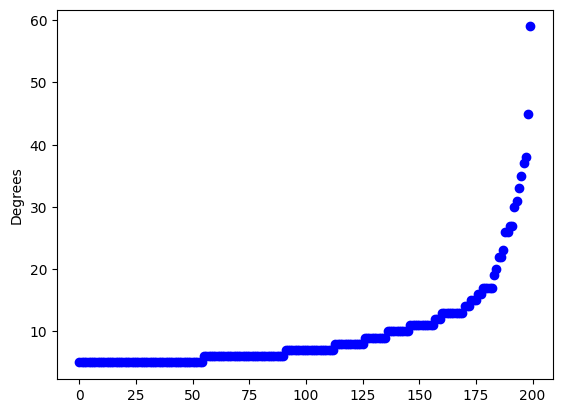

In [72]:
degs_sorted = np.sort(sum(A_BA))

plt.plot(range(len(degs_sorted)),degs_sorted,'bo')
plt.ylabel('Degrees')
plt.show()

## Task 5: Influence Maximization and Blocking [30 points]

In [20]:
# parameters: DO NOT CHANGE
p = 0.05
mc = 5000
k=10
#k = 1

In [21]:
from task_5 import greedySearch, modify_graph

In [22]:
#graph = Graph(ssp.load_npz('../data/example_graph.npz'))
graph = Graph(ssp.load_npz('../data/BA_graph_100.npz'))

In [23]:
seeds, influence = greedySearch(graph,k,p,mc)

In [24]:
seeds, influence

([1], [0.0, 3.437])

In [102]:
# we recommend saving the results into files
#np.savetxt('../result/IM_seeds.txt', seeds, fmt = '%s')
#np.savetxt('../result/IM_influence.txt', influence, fmt = '%f')

# uncomment these lines if you want to read the values instead of recalculating them 
# seeds = np.loadtxt('../result/IM_seeds.txt', dtype = int)
# influence = np.loadtxt('../result/IM_influence.txt', dtype = float)

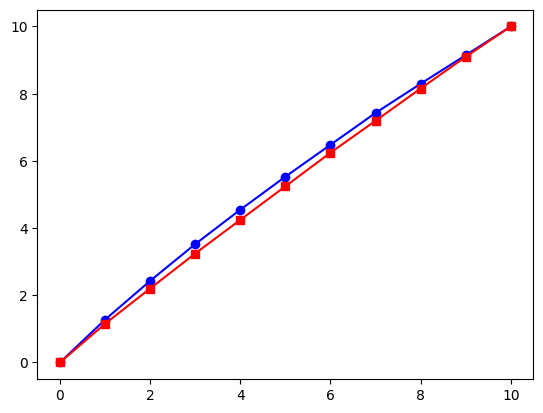

In [103]:
# randomly select nn nodes; DO NOT CHANGE nn=50 BELOW
nn=50
#nn=10
np.random.seed(15)
target_nodes = np.random.choice(range(graph.n), nn, replace = False)

# each node in seed_set will randomly block a neighbor 
# equivalently, delete the edge between that node and the neighbor

# create a modified graph
graph_new = Graph(modify_graph(graph,target_nodes))

# TODO: compute the seeds and influences over the new graph using the same parameters
seeds_new, influence_new = greedySearch(graph_new,k,p,mc)

#np.savetxt('../result/IM_seeds_new.txt', seeds_new, fmt = '%s')
#np.savetxt('../result/IM_influence_new.txt', influence_new, fmt = '%f')

# uncomment these lines if you want to read the values instead of recalculating them 
# seeds_new = np.loadtxt('../result/IM_seeds_new.txt', dtype = int)
# influence_new = np.loadtxt('../result/IM_influence_new.txt', dtype = float)

# plot in the same figure
plt.plot(range(k+1), influence,'-bo',range(k+1), influence_new,'-rs')
plt.show()

In [ ]:
# END